In [1]:
import sys
import os
import json
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))
from Tools import *
from Clusters import *
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, davies_bouldin_score

In [2]:
method = "hierarchical_clustering_agg"
def train(name, data, decay = 10):
    model = HierarchicalClustering(data, 5)
    centroids, labels = model.agglomerative_clustering()
    s_score = silhouette_score(data, labels, metric='euclidean')
    d_score = davies_bouldin_score(data, labels)
    print(s_score)
    print(d_score)
    print(centroids)
    print(labels)
    np.save(f'../Lib/Centroids/{name}_{method}.npy', centroids)
    np.save(f'../Lib/Labels/{name}_{method}.npy', labels)
    result = {
        "silhouette_score": s_score,
        "davies_bouldin_index": d_score
    }
    with open(f'../Lib/Score/{name}_{method}.json', 'w', encoding='utf-8') as rank:
        json.dump(result, rank, ensure_ascii=False, indent=4)
    return (centroids, labels), (s_score, d_score)

def visualize(name, index, data, centroids, labels, labels_name): 
    indexs = [item for item in range(len(labels_name)) if item != index]
    X_reduced = data
    final_centroids_reduced = centroids
    fig, axes = plt.subplots(1, 2, figsize=(18, 6))
    axes[0].scatter(X_reduced[:, index], X_reduced[:, indexs[0]], c=labels, cmap='viridis', s=50)
    axes[0].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[0]], c='red', s=200, alpha=0.75, marker='X')
    axes[0].set_xlabel(f'{labels_name[index]}')
    axes[0].set_ylabel(f'{labels_name[indexs[0]]}')
    axes[0].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[0]]}')

    axes[1].scatter(X_reduced[:, index], X_reduced[:, indexs[1]], c=labels, cmap='viridis', s=50)
    axes[1].scatter(final_centroids_reduced[:, index], final_centroids_reduced[:, indexs[1]], c='red', s=200, alpha=0.75, marker='X')
    axes[1].set_xlabel(f'{labels_name[index]}')
    axes[1].set_ylabel(f'{labels_name[indexs[1]]}')
    axes[1].set_title(f'{method} Clustering {labels_name[index]} & {labels_name[indexs[1]]}')

    fig.savefig(f'../Lib/Images/{name}_{labels_name[index]}_{method}.png', dpi=300, bbox_inches='tight')
    # Adjust layout to avoid overlap
    plt.tight_layout()

    # Show the plot
    plt.show()

# FoundationCourses

In [3]:
name_data = "FoundationCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

0.288127826480384
1.005655945994967
[[5.87411504 3.11579467 0.49064219]
 [7.11005334 5.7994677  3.7144082 ]
 [8.90546328 8.15021003 6.4009308 ]
 [8.04757667 6.01147591 0.        ]
 [8.07361659 7.39991904 4.74394802]]
[0 4 2 1 0 2 2 0 2 1 1 1 1 4 2 2 0 4 0 4 4 0 0 1 1 0 4 1 2 1 1 4 0 1 2 1 4
 2 3 3 2 0 2 3 3 0 1 1 2 2 0 0 2 0 4 3 2 2 0 2 4 2 1 2 2 0 4 0 0 0 2 0 0 0
 1 3 3 2 0 2 4 2 2 2 1 1 0 2 2 2 4 0 2 2 1 0 4 4 1 1 3 4 4 2 1 2 3 3 3 0 2
 2 0 0 2 1 3 0 0 2 1 3 2 0 2 1 4 0 3 0 1 0 3 4 0 0 4 2 4 1 0 2 0 4 2 4 3 4
 2 0 2 2 4 0 4 1 4 2 1 4 2 2 1 0 4 2 4 0 4 1 0 2 1 2 4 4 3 4 4 4 0 2 1 0 4
 2 2 2 2 4 3 0 0 2 2 1 2 1 1 1 1 2 2 0 1 4 2 1 4 0 4 2 1 1 2 0 2 2 1 4 1 0
 1 2 2 0 2 0 4 4 3 1 4 0 2 2 2 0 0 4 0 2]


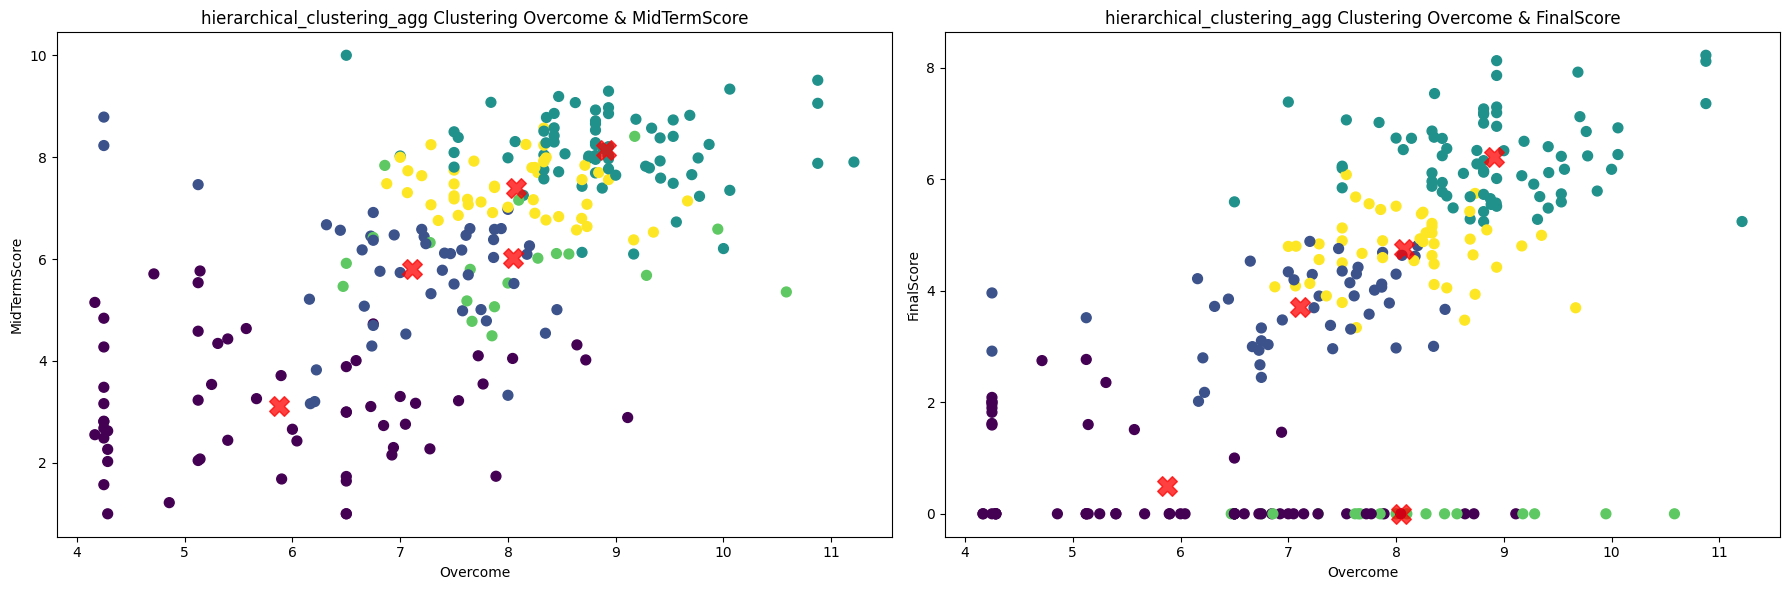

In [4]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

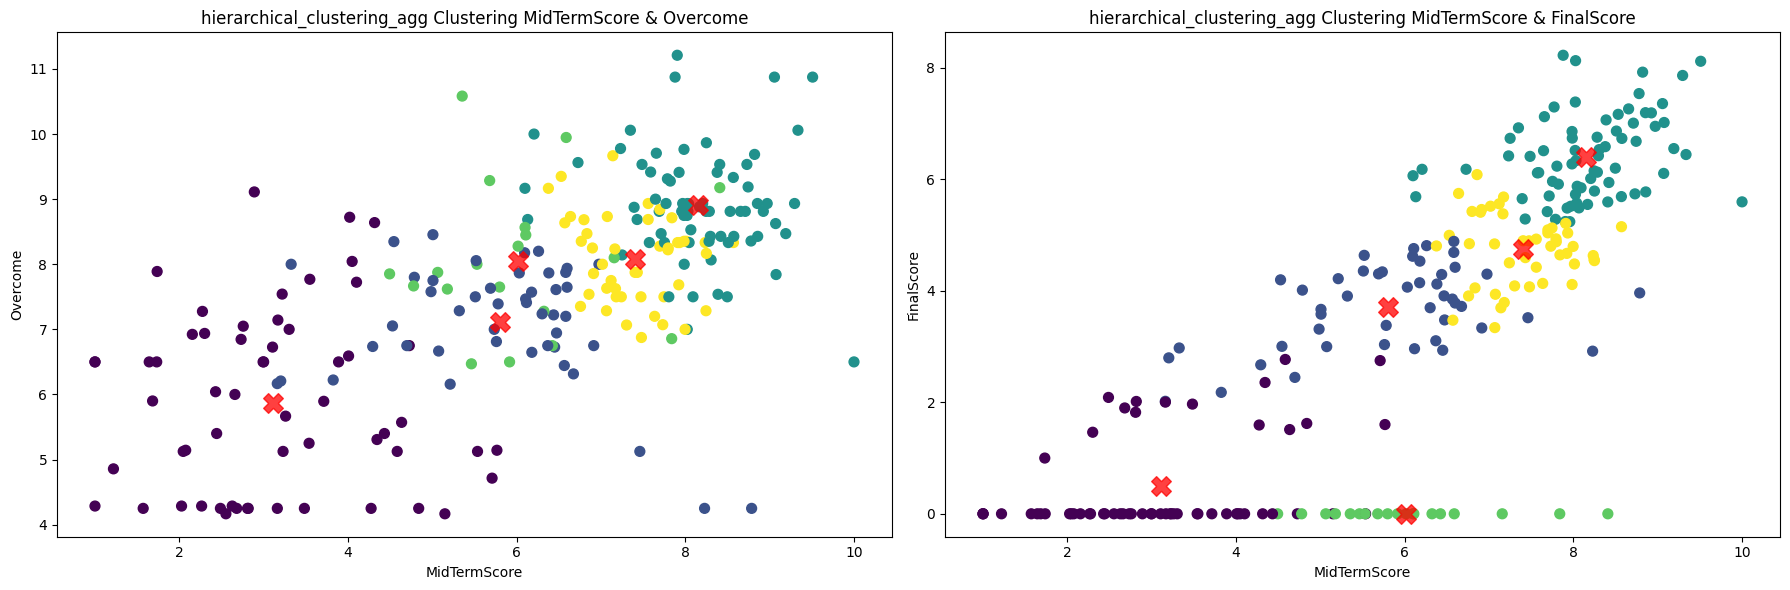

In [5]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

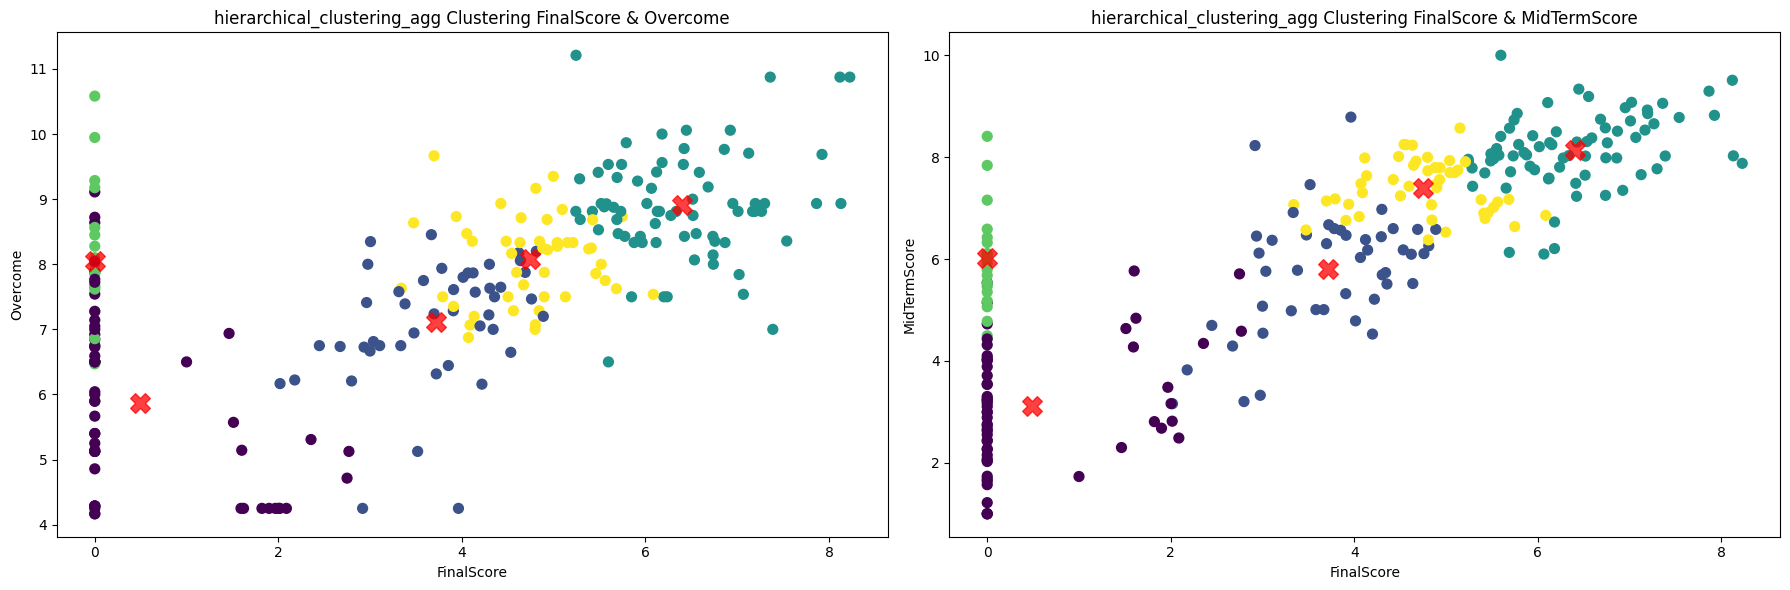

In [6]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# GeneralCourses

In [7]:
name_data = "GeneralCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

0.4517245816849926
0.7482616625549423
[[ 7.52055506  5.46292959  0.        ]
 [ 9.23611519  7.53871152  6.48338698]
 [10.3248039   0.          6.67486553]
 [ 6.48098662  7.85801635  6.58442439]
 [ 3.22624339  2.72319934  0.        ]]
[0 2 1 3 0 2 2 1 1 1 2 3 3 3 1 1 1 1 4 3 1 4 4 1 3 4 2 1 2 3 1 1 0 2 1 3 1
 2 1 0 1 0 2 4 1 0 2 2 1 1 0 3 2 4 1 3 1 1 3 3 1 1 2 3 1 1 2 1 0 1 3 0 0 4
 1 3 1 3 4 3 3 2 3 1 0 3 3 1 1 1 1 0 2 1 3 3 3 2 2 0 3 3 2 2 3 1 0 2 3 0 1
 1 0 0 1 3 1 1 1 1 0 3 2 0 1 3 3 1 1 1 3 4 1 2 0 4 1 1 2 1 4 1 0 2 1 1 1 3
 2 0 1 1 3 0 1 2 3 3 1 2 1 1 3 1 3 1 0 0 1 3 2 0 3 1 2 0 1 1 1 2 1 3 1 4 1
 1 1 3 3 0 0 4 0 1 1 3 3 3 1 1 3 3 1 1 1 1 2 3 2 1 1 3 0 1 0 3 3 1 1 2 1 0
 1 2 2 4 1 0 1 3 3 1 3 4 1 1 3 3 1 1 3 1]


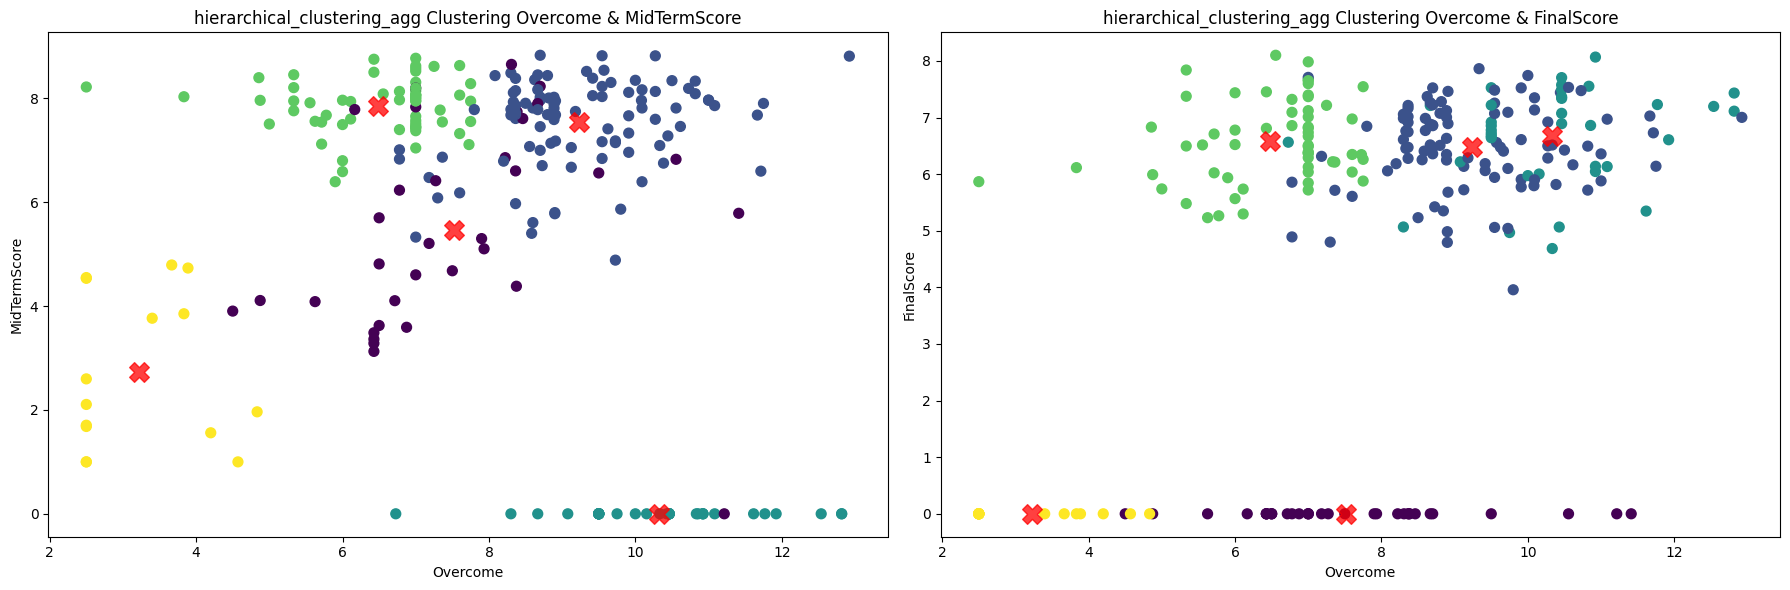

In [8]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

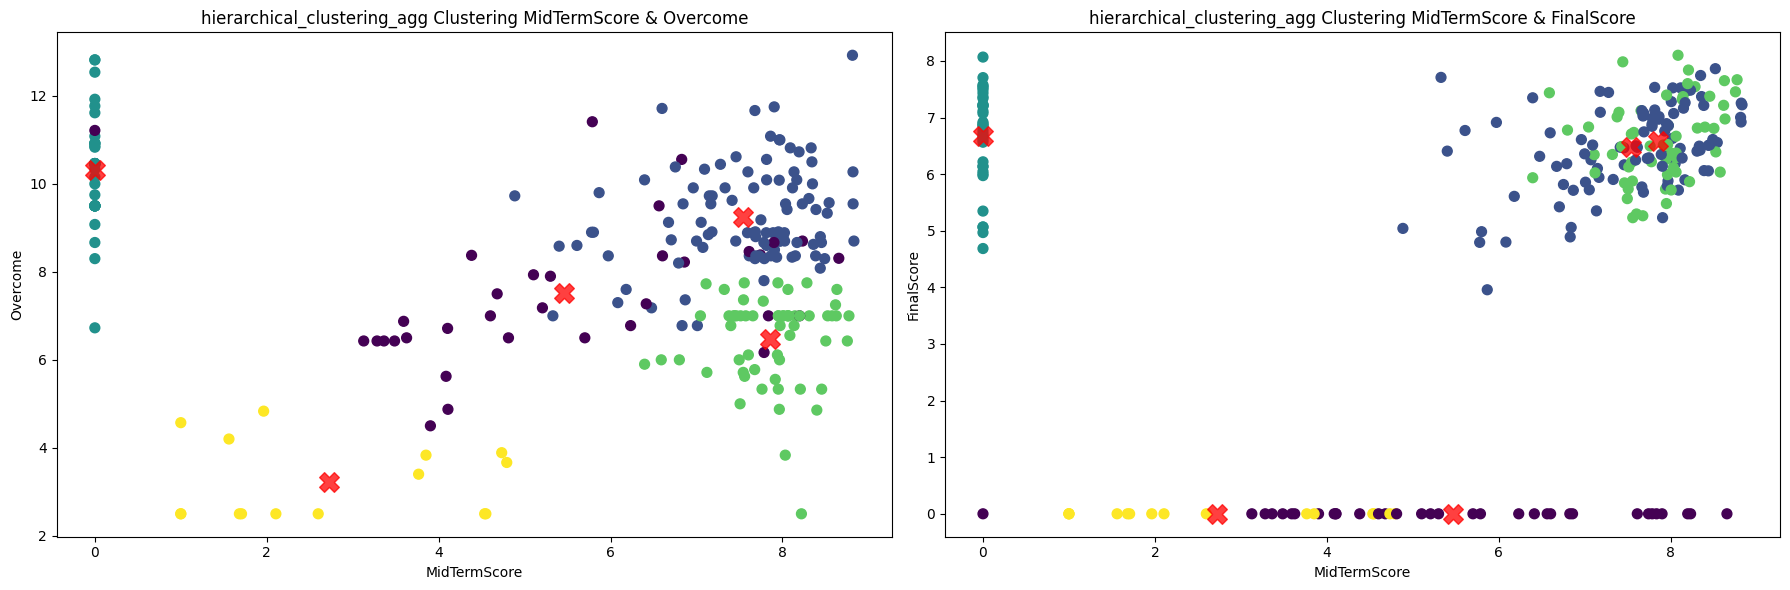

In [9]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

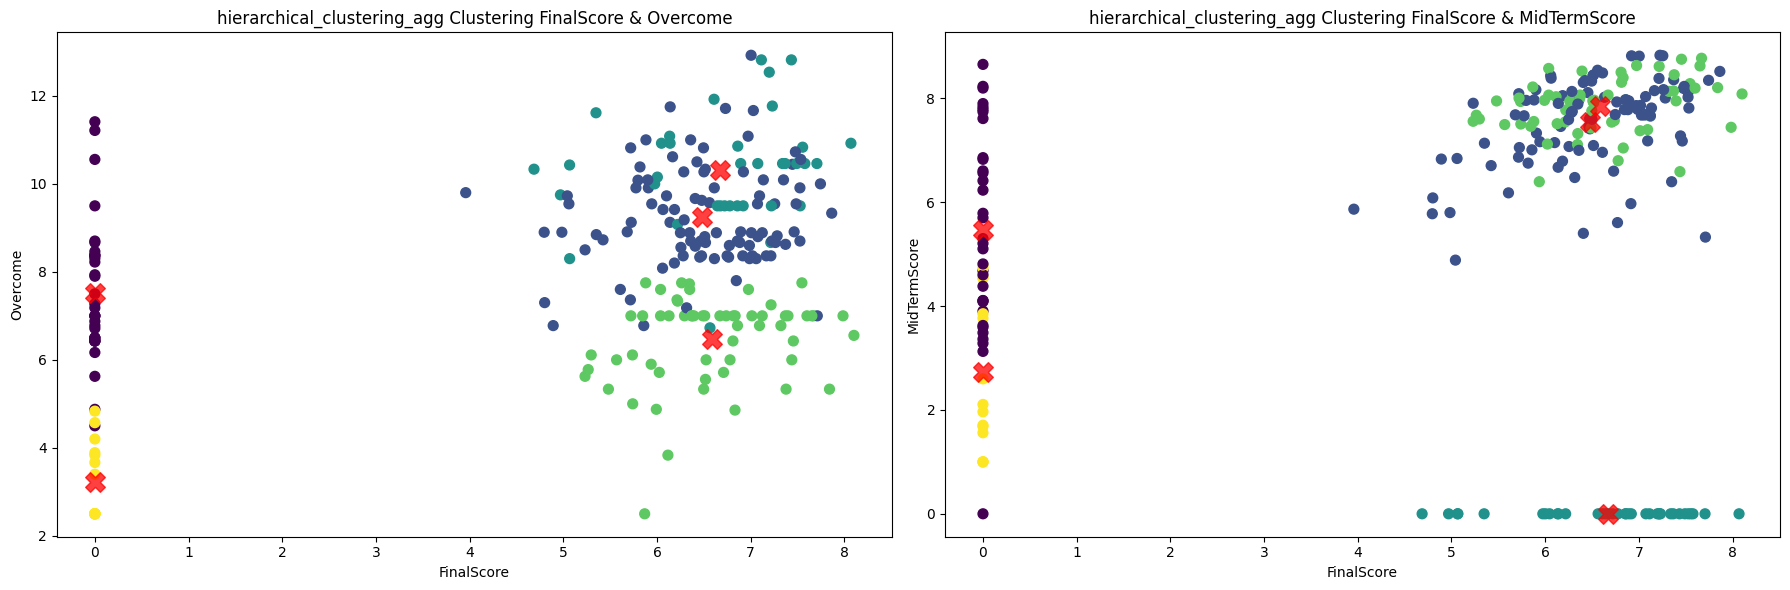

In [10]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)

# MajorCourses

In [11]:
name_data = "MajorCourses"
data, (n_samples, n_feature), labels_name = load_file_json(f"../Data/{name_data}.json")
(centroids_final, labels_final), (s_score, d_score) = train(f"{name_data}", data)

0.36382528761661737
0.7977783522364663
[[ 1.87        3.7426327   3.33389037]
 [16.28545782  7.78449385  7.74782545]
 [12.76140096  7.54717371  7.35794356]
 [16.23626374  5.76793317  0.        ]
 [ 9.13333333  2.3763764   1.84248093]]
[0 2 1 1 0 2 1 2 1 2 2 0 2 1 2 1 0 2 1 1 2 3 2 3 2 1 0 2 4 1 1 2 2 1 2 1 2
 0 2 1 1 2 1 1 0 1 2 2 2 1 2 1 2 2 2 1 1 2 0 3 2 0 4 0 0 2 2 2 2 2 2 2 1 2
 2 0 2 1 2 2 2 2 2 2 2 1 1 2 3 1 2 2 1 1 2 2 2 2 2 1 0 1 2 2 4 0 1 2 1 2 1
 1 2 2 2 2 2 2 2 1 1 0 1 2 1 2 1 1 2 4 2 2 1 1 1 1 2 1 2 1 2 1 0 2 2 2 2 3
 2 2 2 2 1 2 3 1 1 1 0 2 1 2 2 1 2 2 2 2 2 2 1 2 2 2 1 2 1 2 0 2 2 2 2 2 4
 2 1 0 1 2 2 1 2 1 2 1 2 2 2 2 2 1 1 2 1 0 2 1 2 2 2 1 2]


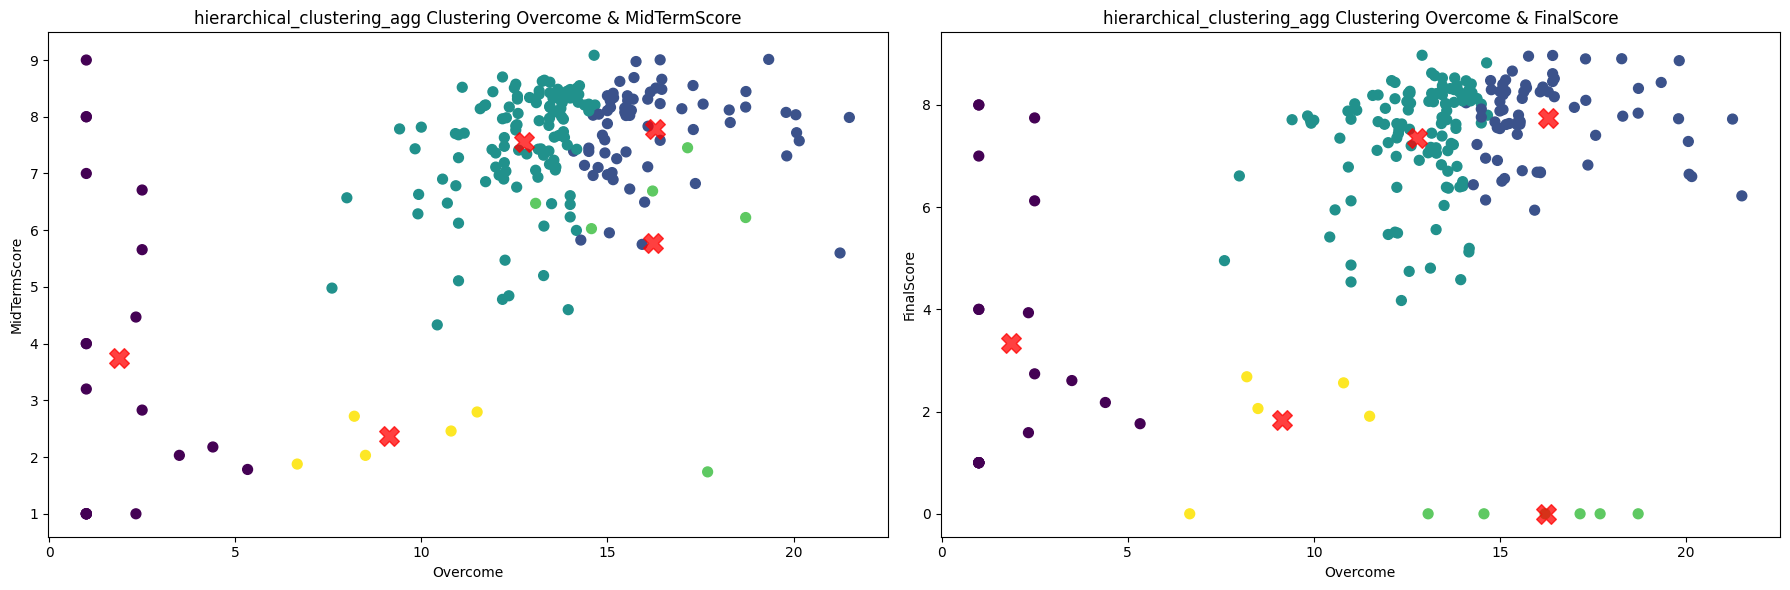

In [12]:
visualize(name_data, 0, data, centroids_final, labels_final, labels_name)

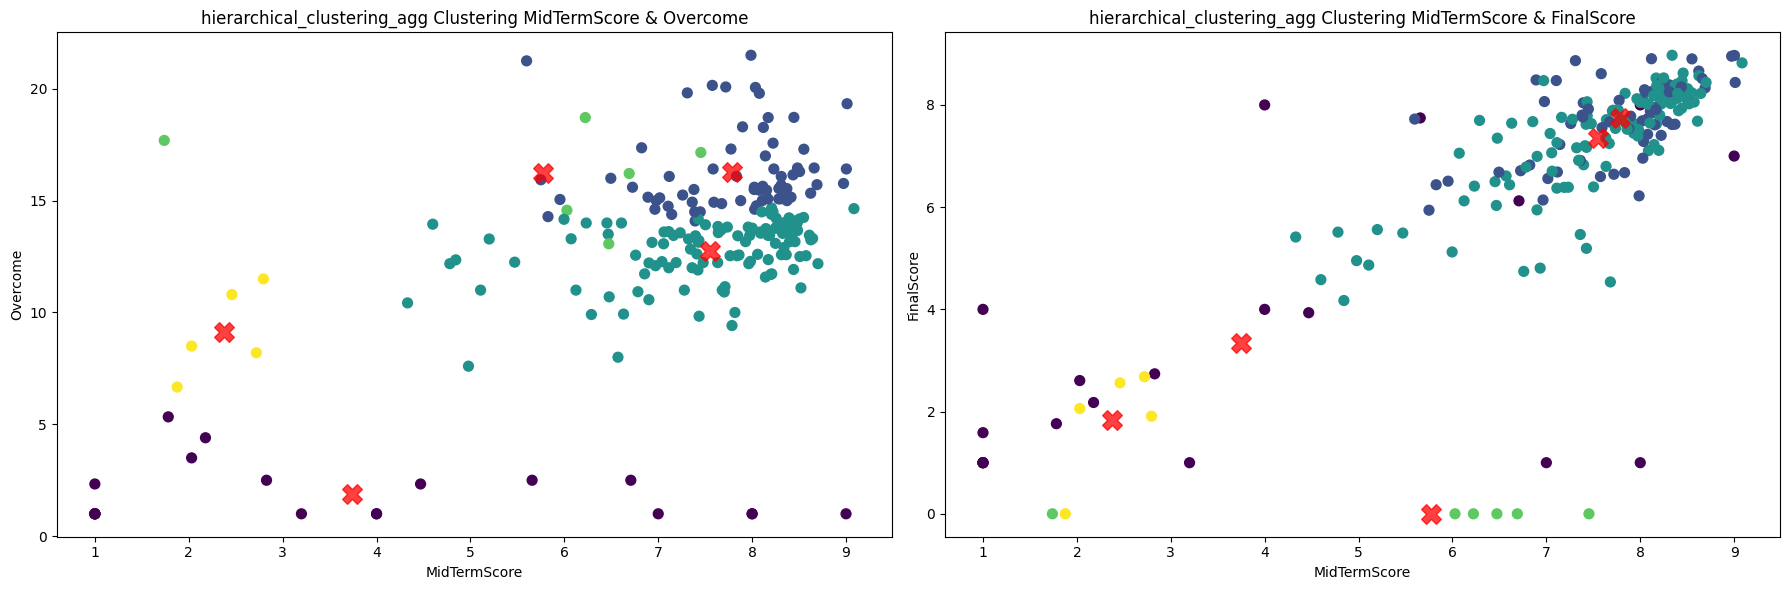

In [13]:
visualize(name_data, 1, data, centroids_final, labels_final, labels_name)

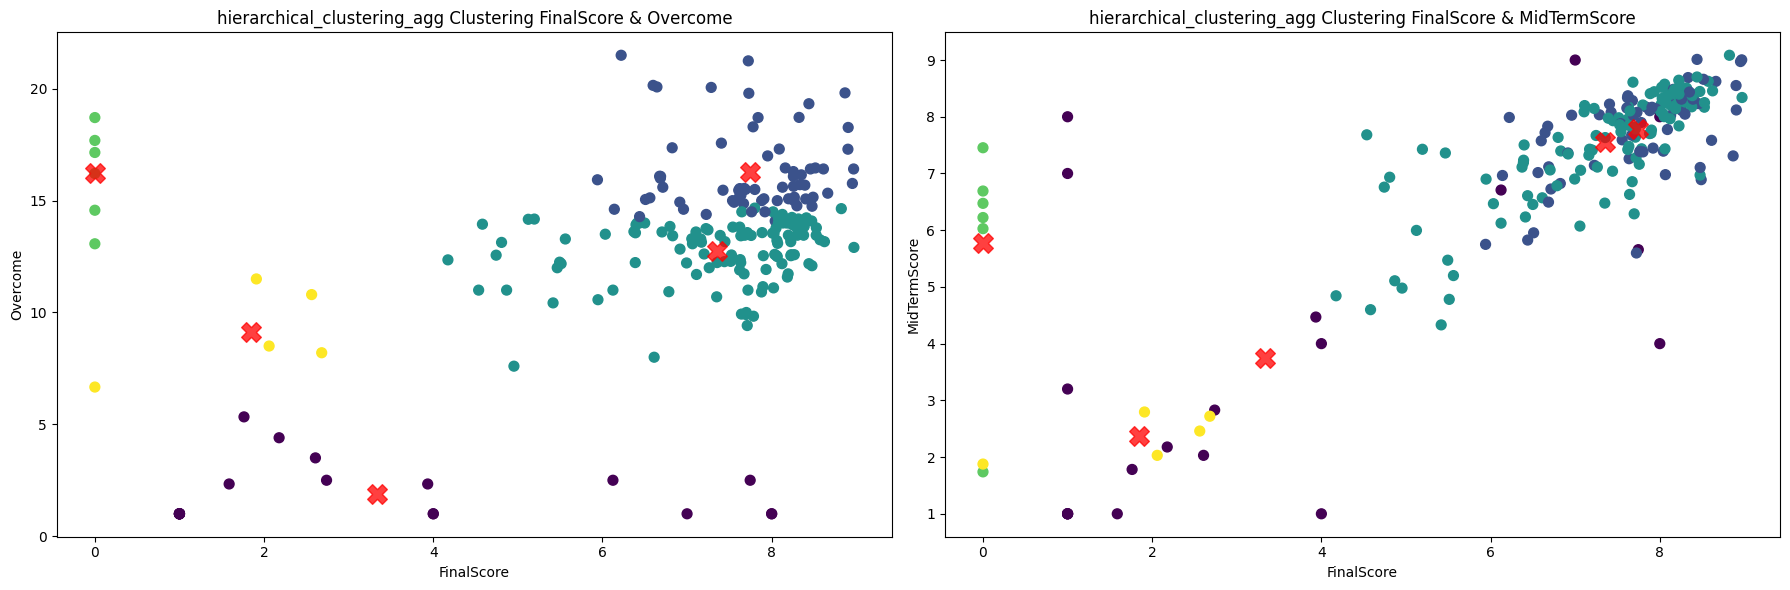

In [14]:
visualize(name_data, 2, data, centroids_final, labels_final, labels_name)